In [166]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/bank-customer-churn-prediction/Churn_Modelling.csv


In [167]:
import warnings
warnings.filterwarnings("ignore")

In [168]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, AdaBoostClassifier, StackingClassifier, GradientBoostingClassifier
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, make_scorer, f1_score, recall_score, precision_score
from xgboost import XGBClassifier

In [169]:
data = pd.read_csv('/kaggle/input/bank-customer-churn-prediction/Churn_Modelling.csv')

In [170]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [171]:
data = data.drop('RowNumber', axis=1)

In [172]:
data.describe(include='all')

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


Np of unique values in each column 

In [173]:
data.nunique()

CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

No NaN in each column

In [174]:
data.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [175]:
data = data.drop('CustomerId', axis=1)
data = data.drop('Surname', axis=1)

In [176]:
data.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

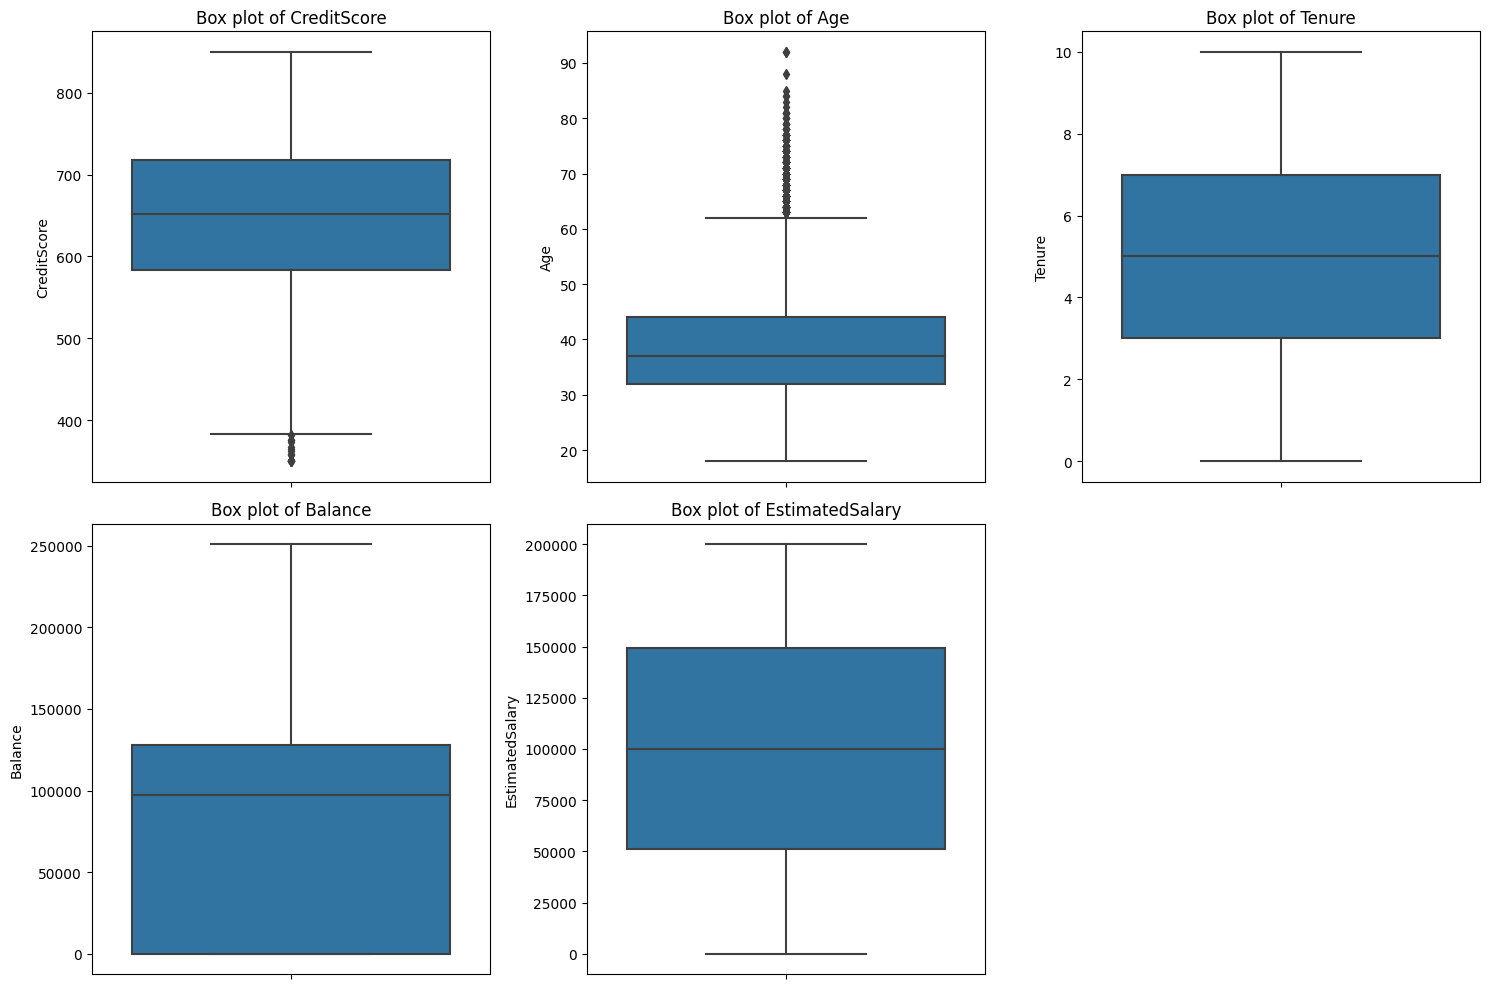

In [177]:
columns_to_plot = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']

plt.figure(figsize=(15, 10))

for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(2, 3, i)  # Adjust subplot grid if needed
    sns.boxplot(y=data[column])
    plt.title(f'Box plot of {column}')

plt.tight_layout()
plt.show()

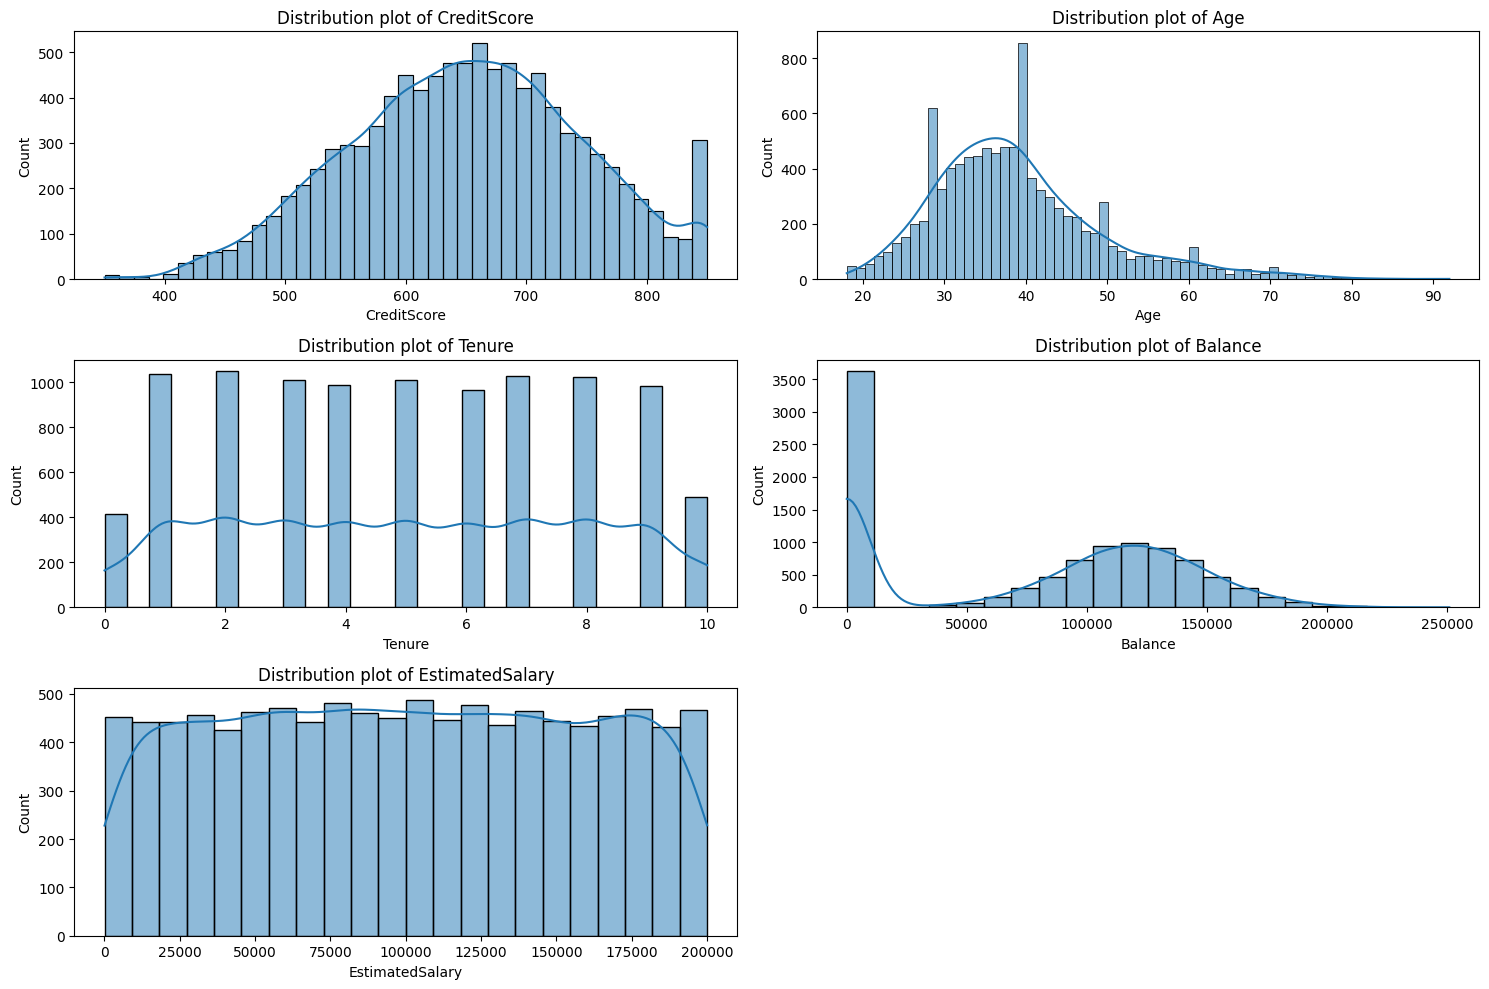

In [178]:
# Generate displots for the specified columns
columns_to_plot = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']

plt.figure(figsize=(15, 10))

for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(3, 2, i)  # Adjust subplot grid if needed
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution plot of {column}')

plt.tight_layout()
plt.show()

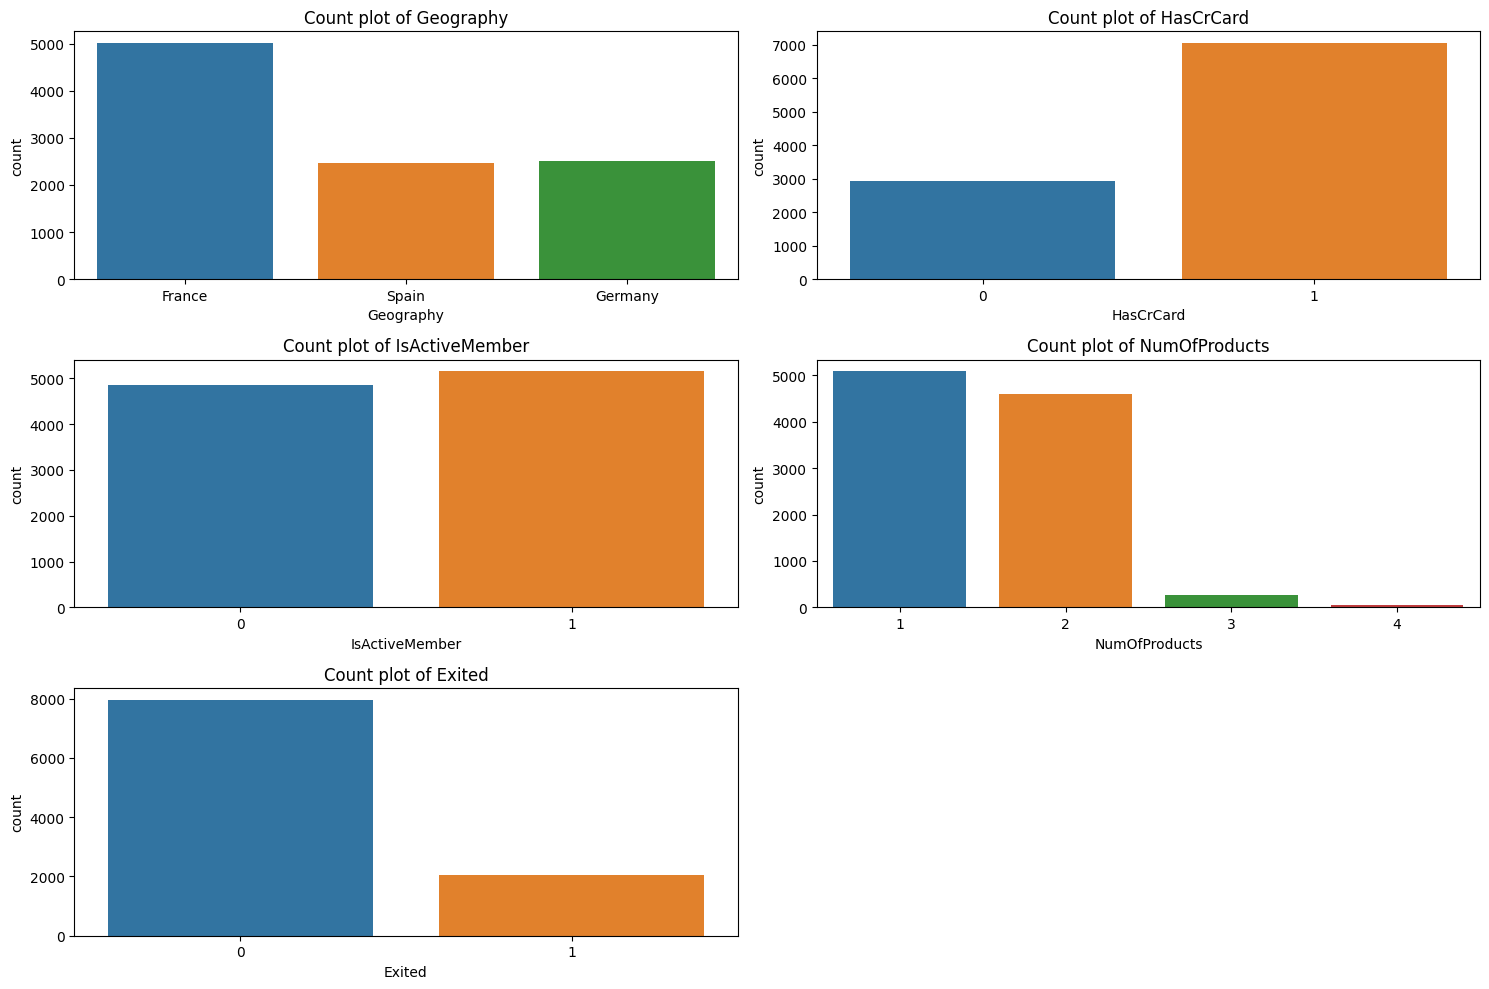

In [179]:
columns_to_plot = ['Geography', 'HasCrCard', 'IsActiveMember', 'NumOfProducts', 'Exited']

plt.figure(figsize=(15, 10))

for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(3, 2, i)  # Adjust subplot grid if needed
    sns.countplot(x=data[column])
    plt.title(f'Count plot of {column}')

plt.tight_layout()
plt.show()

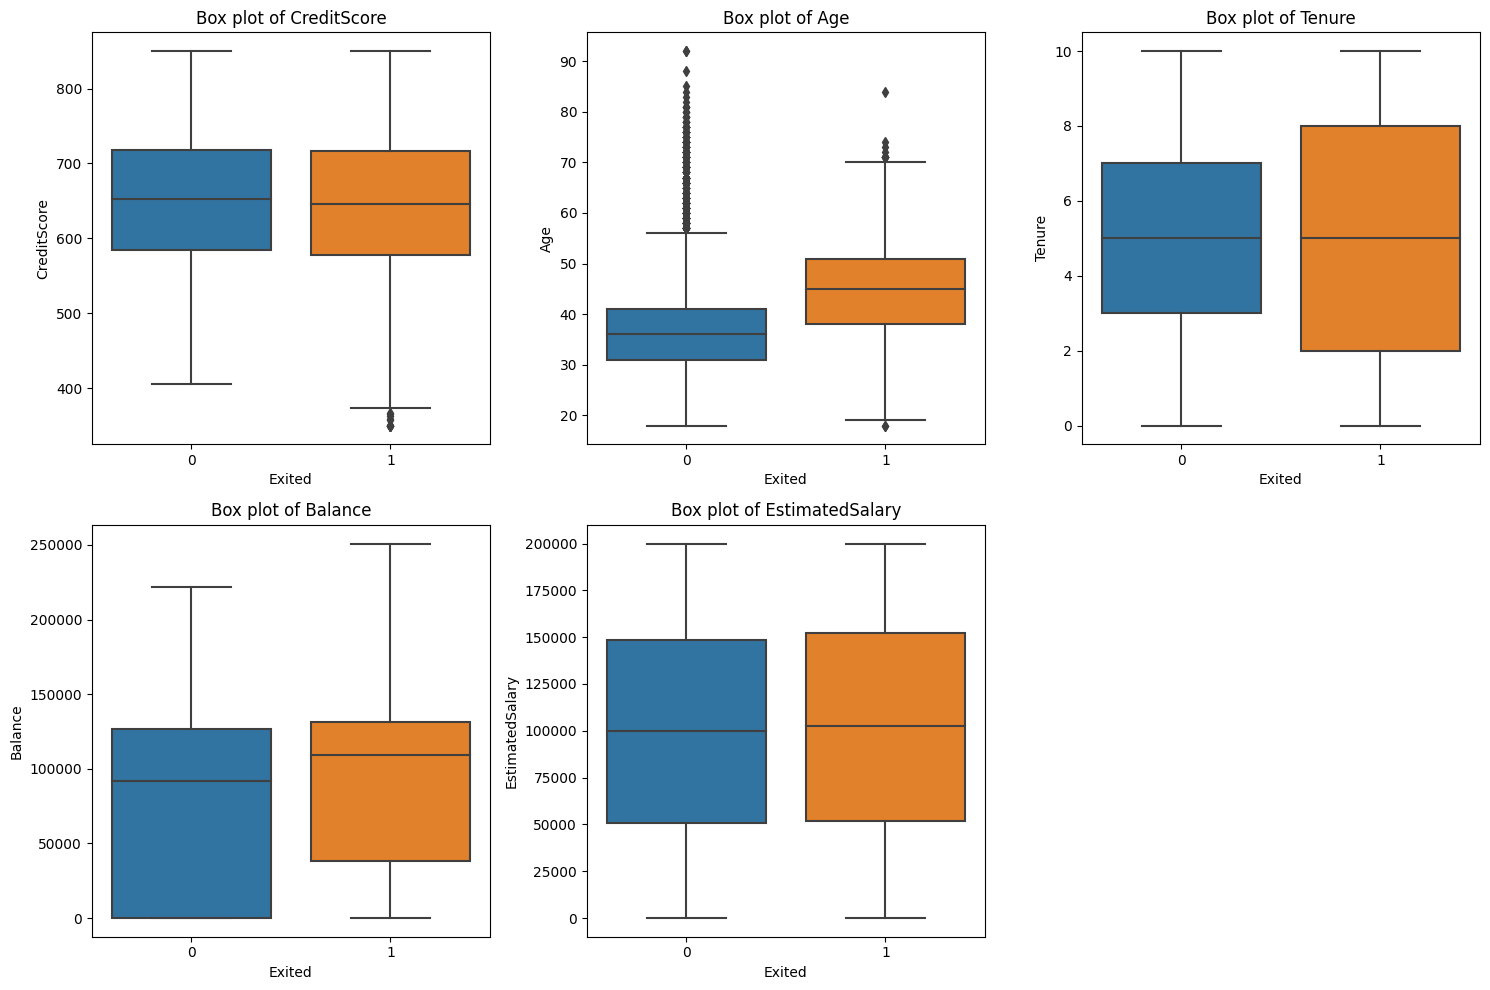

In [180]:
# Generate box plots for the specified columns
columns_to_plot = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']

plt.figure(figsize=(15, 10))

for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(2, 3, i)  # Adjust subplot grid if needed
    sns.boxplot(y=data[column], x=data['Exited'])
    plt.title(f'Box plot of {column}')

plt.tight_layout()
plt.show()

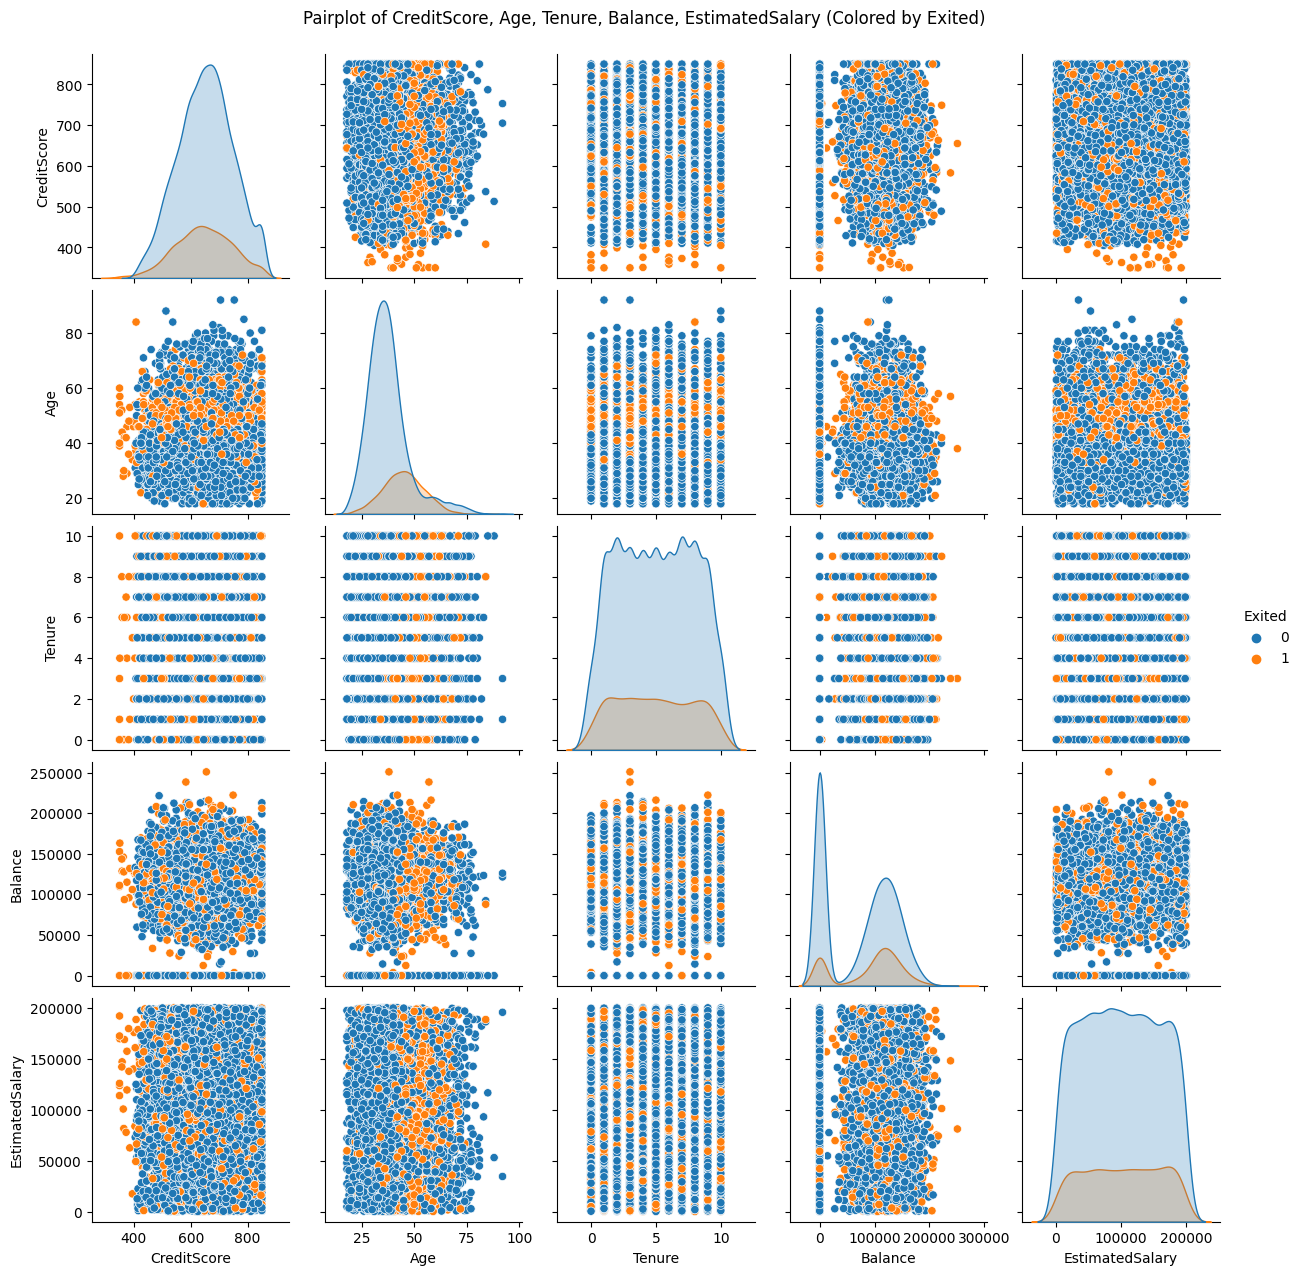

In [181]:
columns_to_plot = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary', 'Exited']
sns.pairplot(data[columns_to_plot], hue='Exited')
plt.suptitle('Pairplot of CreditScore, Age, Tenure, Balance, EstimatedSalary (Colored by Exited)', y=1.02)
plt.show()

In [182]:
'CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary'
'Geography', 'HasCrCard', 'IsActiveMember'
'NumOfProducts'
'Exited'

'Exited'

# One Hot encoding + SMOTE

In [183]:
nominal_cols = ['Geography', 'Gender']
data_nominal_encoded = pd.get_dummies(data[nominal_cols], drop_first=True)
data_nominal_encoded = data_nominal_encoded.astype(int)

# Combine encoded columns back into the DataFrame
df = pd.concat([data.drop(columns=nominal_cols), data_nominal_encoded], axis=1)
df.head(2)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0


In [184]:
y = df[['Exited']]
X = df[['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Geography_Germany','Geography_Spain','Gender_Male']]

In [185]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state = 0)
X_train.shape, y_train.shape, X_test.shape, y_test.shape
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((12740, 11), (12740, 1), (2000, 11), (2000, 1))

# Decision Tree

## Decision Tree without prunning

In [186]:
classifier = DecisionTreeClassifier()
model = classifier.fit(X_train, y_train)

In [187]:
classifier.score(X_train, y_train)

1.0

In [188]:
classifier.score(X_test, y_test)

0.754

Text(0, 0.5, 'Importance')

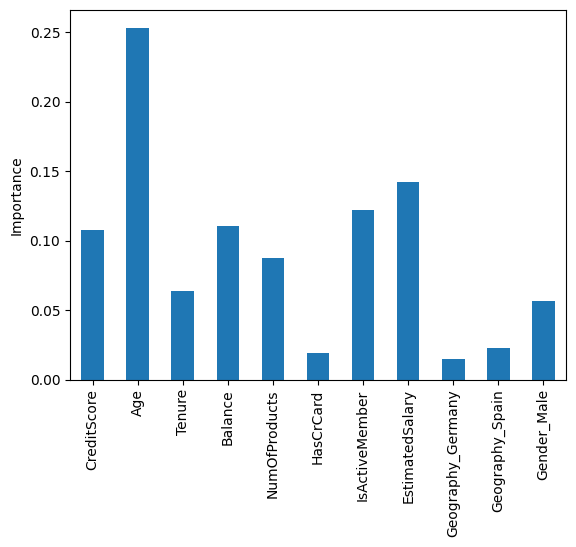

In [189]:
importance = model.feature_importances_
feature_importance = pd.Series(importance, index = X.columns)
feature_importance.plot(kind = 'bar')
plt.ylabel('Importance')

## Decision Tree Post Prunning

In [190]:
classifier = DecisionTreeClassifier(random_state = 0)
path = classifier.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
ccp_alphas = ccp_alphas[0:-1]
len(ccp_alphas)

856

In [191]:
train_scores, test_scores = [], []
abs_score_diffs = []
f1_scores, recalls, precisions = [], [], []

f1_scorer = make_scorer(f1_score, average='macro')
recall_scorer = make_scorer(recall_score, average='macro')
precision_scorer = make_scorer(precision_score, average='macro')

for alpha in ccp_alphas:
    classifier = DecisionTreeClassifier(random_state=0, ccp_alpha=alpha)
    
    train_cv_scores = cross_val_score(classifier, X_train, y_train, cv=5)
    test_cv_scores = cross_val_score(classifier, X_test, y_test, cv=5)
    
    train_score = np.mean(train_cv_scores)
    test_score = np.mean(test_cv_scores)
    train_scores.append(train_score)
    test_scores.append(test_score)
    abs_score_diff = np.abs(train_score - test_score)
    abs_score_diffs.append(abs_score_diff)
    
    model_ = classifier.fit(X_train, y_train)
    
    y_pred = model_.predict(X_test)
    
    report = classification_report(y_test, y_pred, output_dict=True)
    f1_scores.append(report['macro avg']['f1-score'])
    recalls.append(report['macro avg']['recall'])
    precisions.append(report['macro avg']['precision'])

In [192]:
min_diff_index = np.argmin(abs_score_diffs)
best_alpha = ccp_alphas[min_diff_index]
print("Min score diff :",min(abs_score_diffs))
print("index of best alpha : ", min_diff_index)
print("Best alpha : ", best_alpha)

Min score diff : 0.0004128728414443117
index of best alpha :  826
Best alpha :  0.0009494854875442462


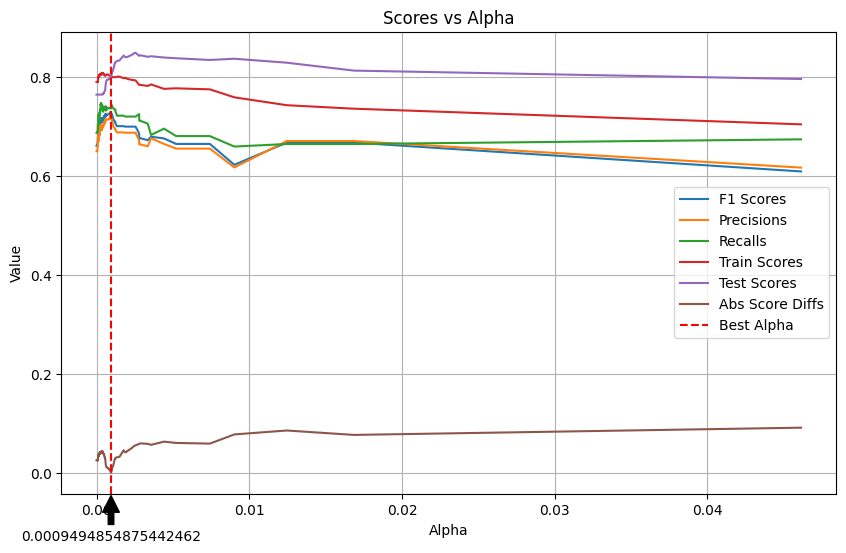

In [193]:
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, f1_scores, label='F1 Scores')
plt.plot(ccp_alphas, precisions, label='Precisions')
plt.plot(ccp_alphas, recalls, label='Recalls')
plt.plot(ccp_alphas, train_scores, label='Train Scores')
plt.plot(ccp_alphas, test_scores, label='Test Scores')
plt.plot(ccp_alphas, abs_score_diffs, label='Abs Score Diffs')

plt.axvline(x=best_alpha, linestyle='--', label='Best Alpha', color='r')

# Annotate the best alpha value on the plot
plt.annotate(f'{best_alpha}', 
             xy=(best_alpha, plt.ylim()[0]), 
             xytext=(best_alpha, plt.ylim()[0] - (plt.ylim()[1] - plt.ylim()[0]) * 0.1),
             arrowprops=dict(facecolor='black', shrink=0.05),
             horizontalalignment='center')

plt.xlabel("Alpha")
plt.ylabel("Value")
plt.title("Scores vs Alpha")
plt.legend()
plt.grid(True)
plt.show()

In [194]:
classifier = DecisionTreeClassifier(random_state=0, ccp_alpha=0.0009494854875442462)
model = classifier.fit(X_train, y_train)

In [195]:
model.score(X_train, y_train)

0.8171114599686028

In [196]:
model.score(X_test, y_test)

0.8185

In [197]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.87      0.88      1593
           1       0.55      0.60      0.57       407

    accuracy                           0.82      2000
   macro avg       0.72      0.74      0.73      2000
weighted avg       0.82      0.82      0.82      2000



Text(0, 0.5, 'Importance')

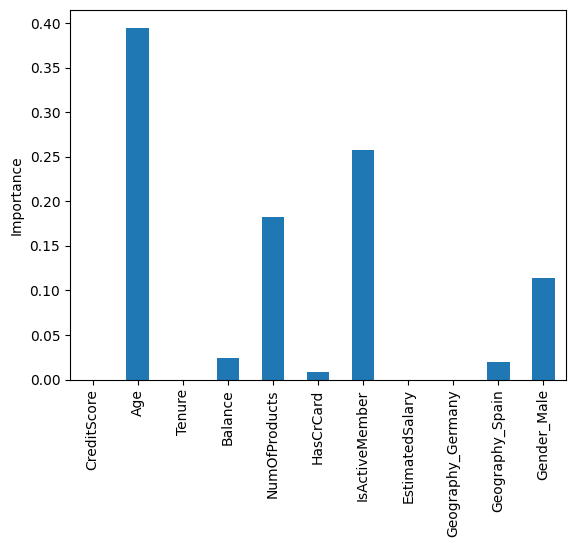

In [198]:
importance = model.feature_importances_
feature_importance = pd.Series(importance, index = X.columns)
feature_importance.plot(kind = 'bar')
plt.ylabel('Importance')

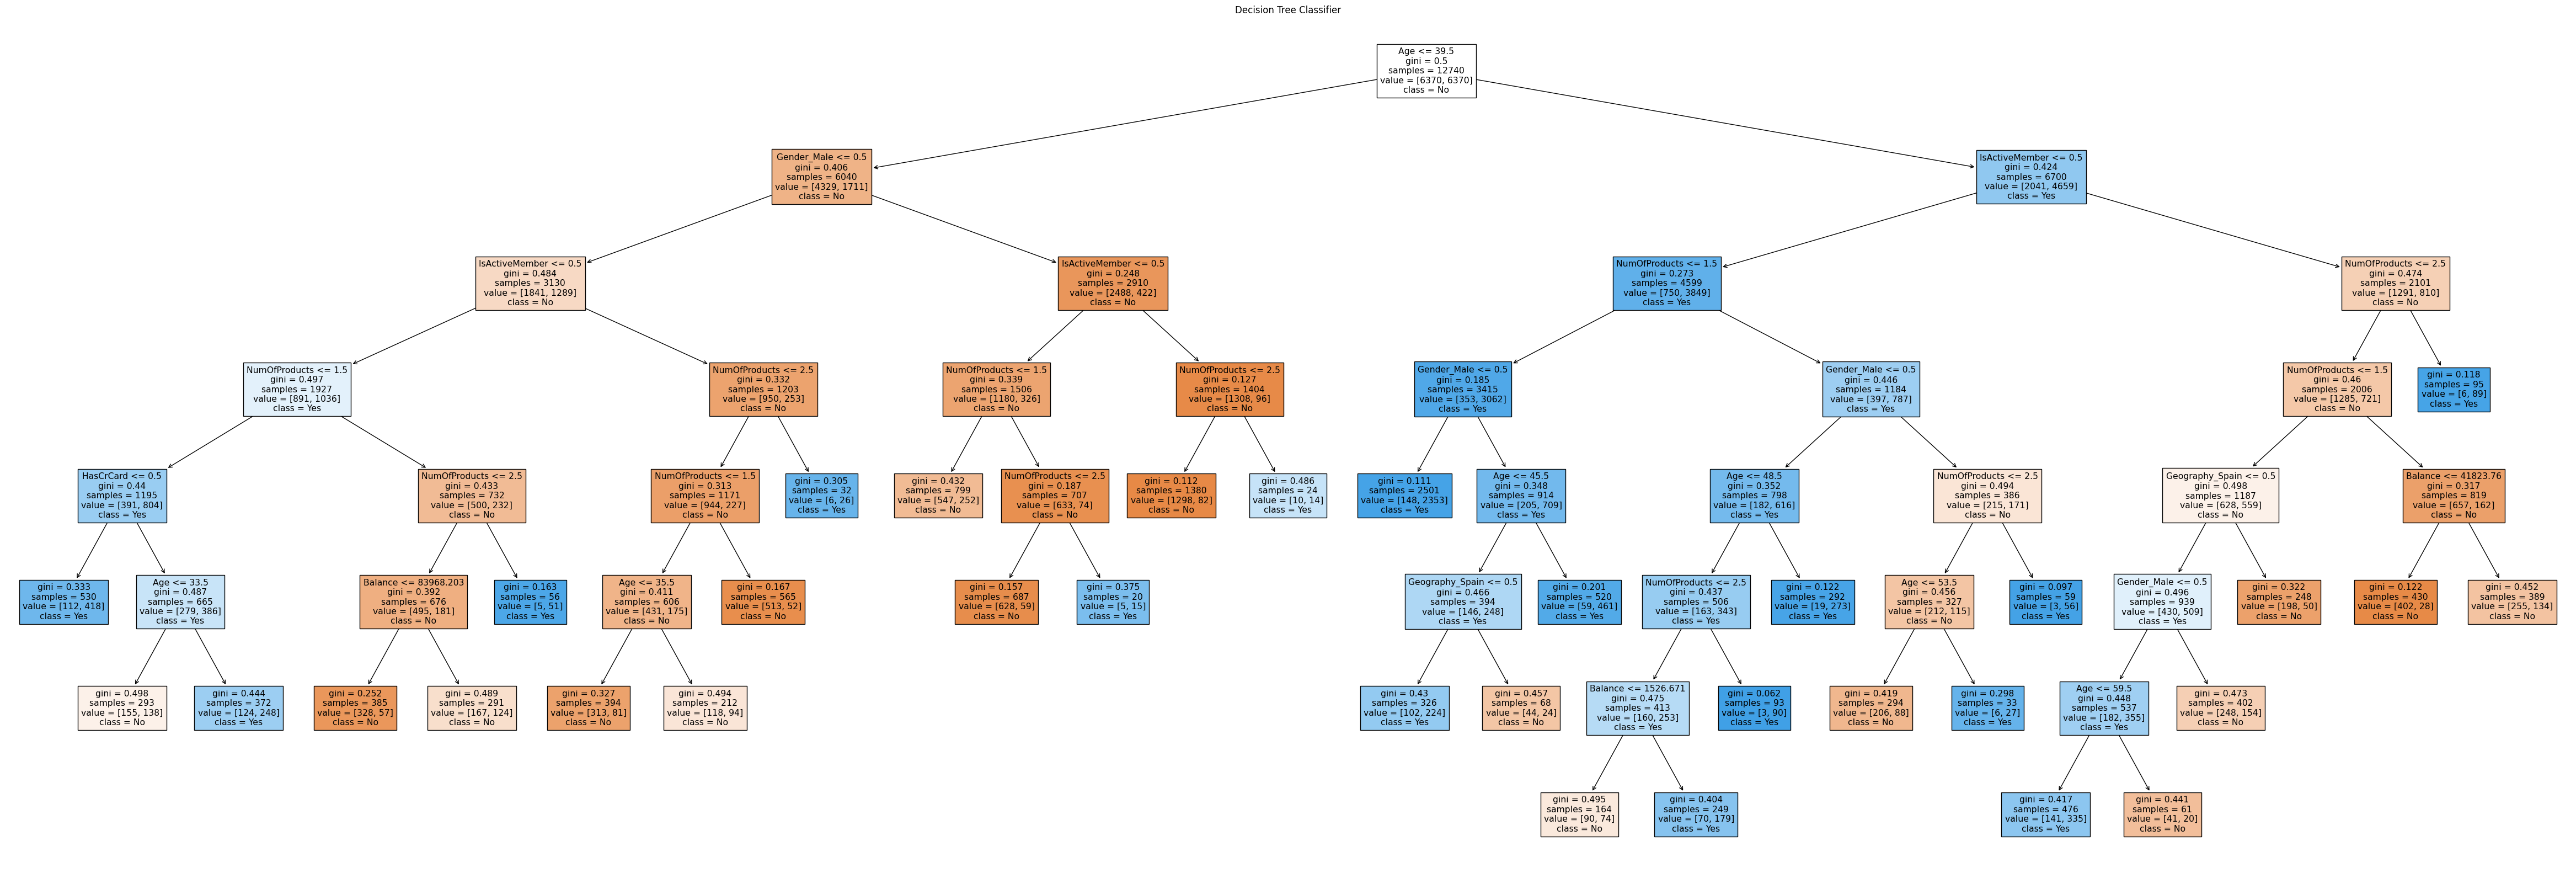

In [199]:
plt.figure(figsize=(60, 20))
plot_tree(model, feature_names=X.columns, class_names=['No', 'Yes'], filled=True, rounded=False)
plt.title("Decision Tree Classifier")
plt.show()

# Random Forest

## Random Forest without prunning

In [200]:
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

RandomForestClassifier()

In [201]:
classifier.score(X_train, y_train)

1.0

In [202]:
classifier.score(X_test, y_test)

0.8155

Text(0, 0.5, 'Importance')

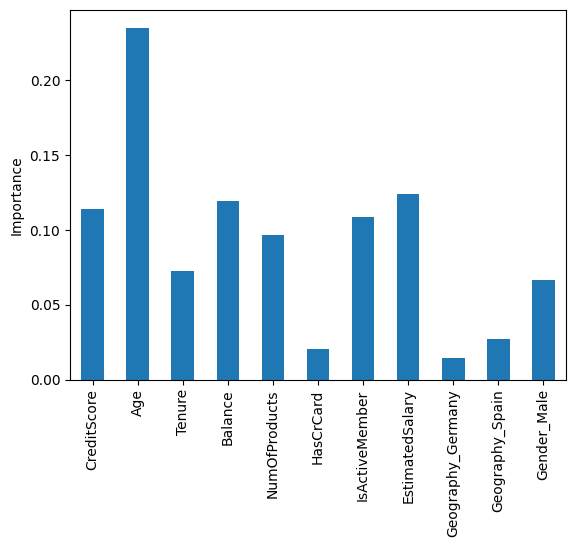

In [203]:
importance = classifier.feature_importances_
feature_importance = pd.Series(importance, index = X.columns)
feature_importance.plot(kind = 'bar')
plt.ylabel('Importance')

## Random Forest Pre Prunning

In [ ]:
grid = {
    'n_estimators' : [9, 17, 31, 41, 51],
    'max_depth': range(2, 12),
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6]
}
classifier = RandomForestClassifier(random_state = 0)
gcv = GridSearchCV(estimator=classifier, param_grid=grid, cv=5, verbose=3)
gcv.fit(X_train, y_train)

In [205]:
gcv.best_params_

{'max_depth': 11,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 51}

In [206]:
model = gcv.best_estimator_
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=11, min_samples_split=4, n_estimators=51,
                       random_state=0)

In [207]:
model.score(X_train, y_train)

0.9040816326530612

In [208]:
model.score(X_test, y_test)

0.808

In [209]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.85      0.88      1593
           1       0.52      0.63      0.57       407

    accuracy                           0.81      2000
   macro avg       0.71      0.74      0.72      2000
weighted avg       0.82      0.81      0.81      2000



Text(0, 0.5, 'Importance')

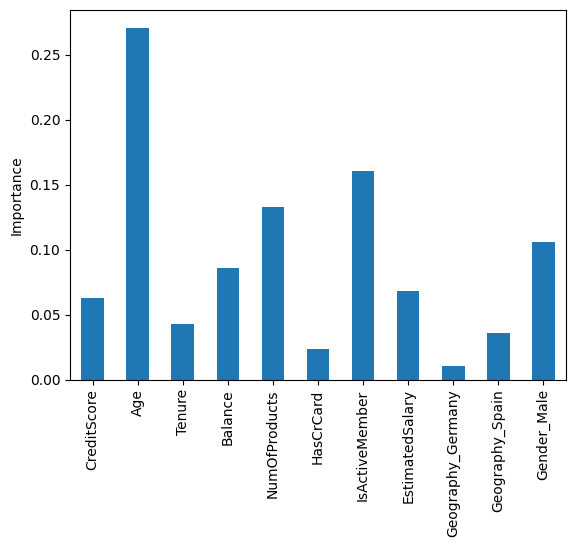

In [210]:
importance = model.feature_importances_
feature_importance = pd.Series(importance, index = X.columns)
feature_importance.plot(kind = 'bar')
plt.ylabel('Importance')

# Ada Boost Classifier

## AdaBoostClassifier without prunning

In [211]:
classifier = AdaBoostClassifier()
classifier.fit(X_train, y_train)

AdaBoostClassifier()

In [212]:
classifier.score(X_train, y_train)

0.8295918367346938

In [213]:
classifier.score(X_test, y_test)

0.7835

Text(0, 0.5, 'Importance')

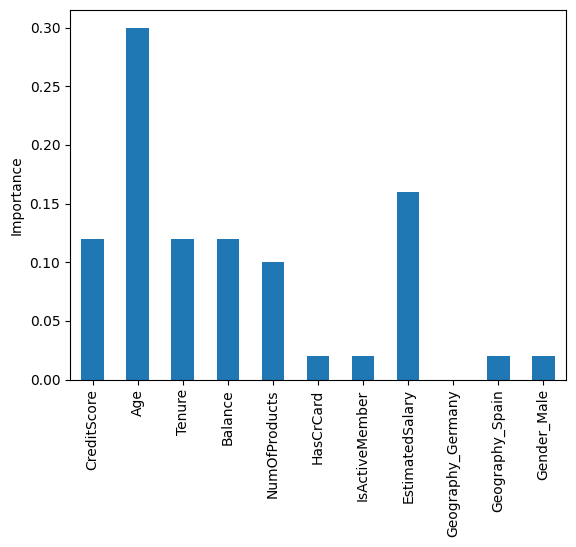

In [214]:
importance = classifier.feature_importances_
feature_importance = pd.Series(importance, index = X.columns)
feature_importance.plot(kind = 'bar')
plt.ylabel('Importance')

## AdaBoostClassifier with Post Prunning

In [ ]:
grid = {
    'n_estimators' : range(10, 90, 10),
    'learning_rate': [.3, .4, .8, 1, 1.2, 1.4]
}
classifier = AdaBoostClassifier(random_state = 0)
gcv = GridSearchCV(estimator=classifier, param_grid=grid, cv=5, verbose=3)
gcv.fit(X_train, y_train)

In [216]:
gcv.best_params_

{'learning_rate': 1, 'n_estimators': 70}

In [217]:
model = gcv.best_estimator_
model.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=1, n_estimators=70, random_state=0)

In [218]:
model.score(X_train, y_train)

0.8294348508634223

In [219]:
model.score(X_test, y_test)

0.783

In [220]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.82      0.86      1593
           1       0.48      0.64      0.55       407

    accuracy                           0.78      2000
   macro avg       0.69      0.73      0.70      2000
weighted avg       0.81      0.78      0.79      2000



Text(0, 0.5, 'Importance')

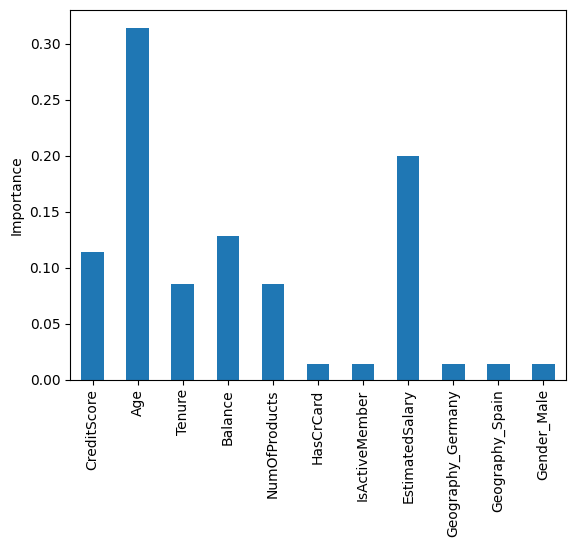

In [221]:
importance = model.feature_importances_
feature_importance = pd.Series(importance, index = X.columns)
feature_importance.plot(kind = 'bar')
plt.ylabel('Importance')

# XGBoost

## XGBoost without Prunning

In [222]:
classifier = XGBClassifier(random_state=0)
classifier.fit(X_train, y_train)
classifier.score(X_train, y_train), classifier.score(X_test, y_test)

(0.9511773940345369, 0.814)

## XGBoost Pre Tunning

In [ ]:
grid = {
    'reg_lambda' :  np.arange(.5, 1.5, 0.2),
    'reg_alpha' : np.arange(0, 1.5, 0.2),
    'min_child_weight': [.8, 1, 1.2]
}
classifier = XGBClassifier(random_state=0)
gcv = GridSearchCV(estimator=classifier, param_grid=grid, cv=5, verbose=3)
gcv.fit(X_train, y_train)

In [224]:
gcv.best_params_

{'min_child_weight': 0.8, 'reg_alpha': 0.4, 'reg_lambda': 1.0999999999999999}

In [225]:
model = gcv.best_estimator_
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=0.8, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=0, ...)

In [226]:
model.score(X_train, y_train)

0.9519623233908948

In [227]:
model.score(X_test, y_test)

0.813

In [228]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88      1593
           1       0.53      0.63      0.58       407

    accuracy                           0.81      2000
   macro avg       0.72      0.74      0.73      2000
weighted avg       0.83      0.81      0.82      2000



# VotingClassifier

In [229]:
classifier1 = DecisionTreeClassifier(random_state=0, ccp_alpha=0.0009494854875442462)
classifier2 = RandomForestClassifier(random_state=0, max_depth=11, min_samples_leaf=1, min_samples_split=4, n_estimators=51)
classifier3 = AdaBoostClassifier(n_estimators=70, learning_rate=1)
classifier4 = XGBClassifier(min_child_weight=0.8, reg_alpha=0.4, reg_lambda=1.0999999999999999)

voting_classifier = VotingClassifier(estimators=[
    ('decision_tree', classifier1),
    ('random_forest', classifier2),
    ('AdaBoostClassifier', classifier3),
    ('XGBClassifier', classifier4)
], voting='hard')

voting_classifier.fit(X_train, y_train)
voting_classifier.score(X_train, y_train), voting_classifier.score(X_test, y_test)

(0.8759026687598116, 0.8205)

# MODEL COMPARISION

In [231]:
# Initialize the classifiers
classifier1 = DecisionTreeClassifier(random_state=0, ccp_alpha=0.0009494854875442462)
classifier2 = RandomForestClassifier(random_state=0, max_depth=11, min_samples_leaf=1, min_samples_split=4, n_estimators=51)
classifier3 = AdaBoostClassifier(n_estimators=70, learning_rate=1)
classifier4 = XGBClassifier(min_child_weight=0.8, reg_alpha=0.4, reg_lambda=1.0999999999999999)

# Create the voting classifier
voting_classifier = VotingClassifier(estimators=[
    ('decision_tree', classifier1),
    ('random_forest', classifier2),
    ('AdaBoostClassifier', classifier3),
    ('XGBClassifier', classifier4)
], voting='hard')

# Fit the voting classifier
voting_classifier.fit(X_train, y_train)

# Initialize a dictionary to store the results
results = {
    "Model": [],
    "Train Score": [],
    "Test Score": [],
    "F1 Score": [],
    "Recall": [],
    "Precision": []
}

# Function to calculate and store the metrics
def evaluate_model(name, model):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    results["Model"].append(name)
    results["Train Score"].append(model.score(X_train, y_train))
    results["Test Score"].append(model.score(X_test, y_test))
    results["F1 Score"].append(f1_score(y_test, y_test_pred))
    results["Recall"].append(recall_score(y_test, y_test_pred))
    results["Precision"].append(precision_score(y_test, y_test_pred))

evaluate_model("Decision Tree", classifier1)
evaluate_model("Random Forest", classifier2)
evaluate_model("AdaBoost", classifier3)
evaluate_model("XGBoost", classifier4)
evaluate_model("Voting Classifier", voting_classifier)

results_df = pd.DataFrame(results)

results_df

,Model,Train Score,Test Score,F1 Score,Recall,Precision
0,Decision Tree,0.817111,0.8185,0.573443,0.599509,0.549550
1,Random Forest,0.904082,0.8080,0.572383,0.631450,0.523422
2,AdaBoost,0.829435,0.7830,0.546973,0.643735,0.475499
3,XGBoost,0.951962,0.8130,0.576923,0.626536,0.534591
4,Voting Classifier,0.875903,0.8205,0.567990,0.579853,0.556604
